<a href="https://colab.research.google.com/github/josephgonz12/MAS4115/blob/main/audio_with_numpy_unsolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of numpy... and music

numpy ('num-pie' not 'num-pee'!) is a python library for **vector** (also higher-dimensional analos: matrix, tensor) computations modelled after matlab.

> Handling vectors is one of the two good things about matlab.

We will use **numpy.array**'s which work similarly to lists (len, indexing etc), but **they really behave like mathematical vectors** in terms of (*, +)

We'll also look at:
- np.pi
- adding an np.array by a scalar, multiplying by another vector
- np.concatenate
- np.linspace, np.zeros, np.ones
- np.sin, np.cos, np.sqrt, np.log ...
- np.max, np.min

> We won't be using the standard python math library **at all**. As you'll see in a moment work well with numpy...

In later lectures we will learn many functions, and will start using higher-dimensional arrays. For now we stick to 1-dimensional (flat) vectors.



## An application (second part)

In this course we'll often represent data as vectors.

> We've seen in with the text data and term-vectors

Today we'll represent and manipulate sound/music data as vectors (stored as np.arrays). In particular, we will try to **compose music** :)



# Importing numpy and accessing its contents

In [1]:
import numpy as np # we import the numpy package and give it an alias (name)

In [2]:
np.pi, np.cos(0)

(3.141592653589793, np.float64(1.0))

# Basics of np.arrays

> We'll often use them for mathematical vectors. Below $u,v \in \mathbb{R}^4$.

Sometimes you will create np.arrays from lists/tuples

In [3]:
u = np.array([1., 2, 3, 10]) # if you want floats, >= element should be a float!
v = np.array([100.0, 200, 300, 500])

print(u + v) # let's try some more! what does u*v do? what else can we do?

[101. 202. 303. 510.]


In [4]:
v.dtype

dtype('float64')

In [5]:
u

array([ 1.,  2.,  3., 10.])

In [6]:
v*u + 3*v - u - v # v*u is the hadamard product

array([ 299.,  798., 1497., 5990.])

In [7]:
len(u)

4

In [8]:
u.shape

(4,)

In [9]:
u[0], u[-1], u[:2], u[-2:] # indexing/slicing is similar to lists!

(np.float64(1.0), np.float64(10.0), array([1., 2.]), array([ 3., 10.]))

In [10]:
u[:2] = 0 # we can also change a sub-array, useful!
u

array([ 0.,  0.,  3., 10.])

In [11]:
list(u) # if absolutely needed, you can turn an np.array into a regular list (or tuple)

[np.float64(0.0), np.float64(0.0), np.float64(3.0), np.float64(10.0)]

## Arrays of ones and zeros

It's often useful to have a large array of zeros or ones, so that you can do something to them.

In [12]:
np.ones(10), np.zeros(10)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## np.linspace (super useful)

Used to create $n$ numbers evenly spaced between $a$ and $b$ (inclusive).

> It also works if $a$ and $b$ are np.arrays/vectors.

In [13]:
xs = np.linspace(0, np.pi, 10**6)
print(xs, len(xs))

[0.00000000e+00 3.14159580e-06 6.28319159e-06 ... 3.14158637e+00
 3.14158951e+00 3.14159265e+00] 1000000


## Applying functions on np.arrays

If we apply a mathematical function $f : \mathbb{R} \to \mathbb{R}$ to a vector in $\mathbb{R}^n$, numpy will automatically compute $f$ on each component of this vector.

> As we'll see in a moment, this is *much* more efficient than doing a list comprehension!

In [14]:
values = np.sin(xs) # [sin(xs[0]), sin(xs[1])..., ]

In [15]:
len(values)

1000000

In [16]:
values

array([0.00000000e+00, 3.14159580e-06, 6.28319159e-06, ...,
       6.28319159e-06, 3.14159580e-06, 1.22464680e-16])

# Summing etc

In [17]:
np.sum(np.sin(xs))

np.float64(636619.1357472853)

## Extra (timings!)

> We can use %timeit to time an expression, note that it runs the code many times, so it seems it's slower.

ms is 1 thousandth of a second
µs is 1 millionth of a second!



In [18]:
len(xs) / 1e6

1.0

In [19]:
%timeit np.sin(xs)

18.4 ms ± 4.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit [np.sin(x) for x in xs]

1.24 s ± 347 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
import math

In [22]:
%timeit [math.sin(x) for x in xs]

223 ms ± 66.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit sum(xs) # dangerous (slow)!

119 ms ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit np.sum(xs)

365 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Note that the above is:
- ~75x faster than using np.sin in list comprehension (np.sin is really optimized for working on np.arrays not single numbers!)
- ~10x faster than using math.sin in list comprehension


# Concatenating ('chaining')

We can  put one vector after another using the np.concatenate function.

> Note that the function takes a tuple of np.arrays

In [25]:
c = np.concatenate((u,v,u,u,v,v)) # takes tuple of vectors/np.arrays
print(u,v,c)

[ 0.  0.  3. 10.] [100. 200. 300. 500.] [  0.   0.   3.  10. 100. 200. 300. 500.   0.   0.   3.  10.   0.   0.
   3.  10. 100. 200. 300. 500. 100. 200. 300. 500.]


# Making noise

An np.array representing a sine wave can be interpreted as sound. You can actually play it below.

- Try to generate some tones, add them together, multiply by a scalar etc.
- You can also use np.concatenate many basic tones to create longer vectors representing sounds
- You can also mix these longer sounds etc.

This could help: https://en.wikipedia.org/wiki/Piano_key_frequencies



In [26]:
# Don't mind the things below too much, you'll just be using the functions
from IPython.display import Audio

TIMESTEPS_PER_SECOND = 20_000

def make_tone(freq, duration_in_sec=1.):
  ts = np.linspace(0, np.pi*2 * duration_in_sec,
                   int(TIMESTEPS_PER_SECOND * duration_in_sec))
  return np.sin(ts * freq)

def play_sound(sound):
  return Audio(sound, rate=TIMESTEPS_PER_SECOND)

In [27]:
c_4_freq = 261.63	 # some C sound

c_sound = make_tone(c_4_freq, 1)

# this must be the last thing in a cell you do, for some reason
play_sound(c_sound)

In [28]:
type(c_sound)

numpy.ndarray

In [29]:
c_sound[:100]

array([ 0.        ,  0.08210507,  0.16365571,  0.24410125,  0.32289845,
        0.39951524,  0.47343425,  0.54415632,  0.6112039 ,  0.67412424,
        0.73249246,  0.78591442,  0.83402938,  0.87651244,  0.91307673,
        0.94347533,  0.96750299,  0.98499744,  0.99584056,  0.99995912,
        0.99732532,  0.98795694,  0.97191723,  0.94931452,  0.92030143,
        0.88507387,  0.84386972,  0.79696723,  0.7446831 ,  0.68737039,
        0.62541611,  0.55923863,  0.4892848 ,  0.41602702,  0.33995994,
        0.26159725,  0.18146808,  0.10011352,  0.01808293, -0.06406977,
       -0.14578983, -0.22652542, -0.30573137, -0.38287282, -0.45742887,
       -0.52889606, -0.59679181, -0.66065764, -0.72006228, -0.77460461,
       -0.8239163 , -0.86766438, -0.90555344, -0.93732761, -0.96277235,
       -0.98171583, -0.99403014, -0.99963212, -0.99848394, -0.99059335,
       -0.97601364, -0.95484326, -0.92722517, -0.89334586, -0.8534341 ,
       -0.80775941, -0.75663021, -0.70039175, -0.6394238 , -0.57

## Question

Say is a vector $s$ representing a sound of length 10 second. What is the dimension of the vector space $s$ belongs to? In other words, what is $n$ s.t. $s \in \mathbb{R}^n$?

In [31]:
c_sound.shape #Would 10 seconds be 200000 shape?

(20000,)

# Visualizing sounds as graphs of functions

We can plot things with matplotlib, see below.



In particular we can plot the graph of some function $f : X \to \mathbb{R}$, namely $ \{ (x, f(x))\, : x \in X \}$. In our case for each time $t$ we plot the amplitude of the sound at $t$.

In simpler words, for each parameter $x$, on the $y$ axis we plot the value of the function evaluated on $x$

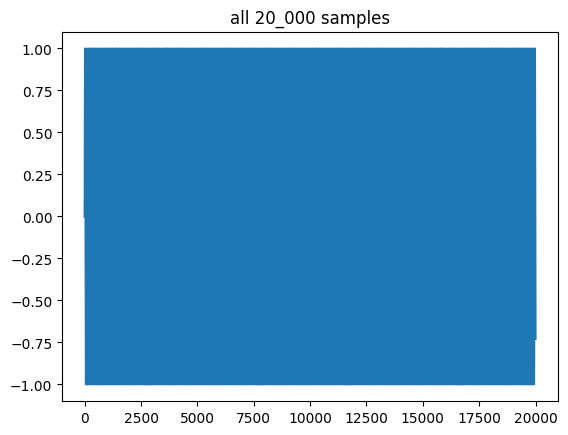

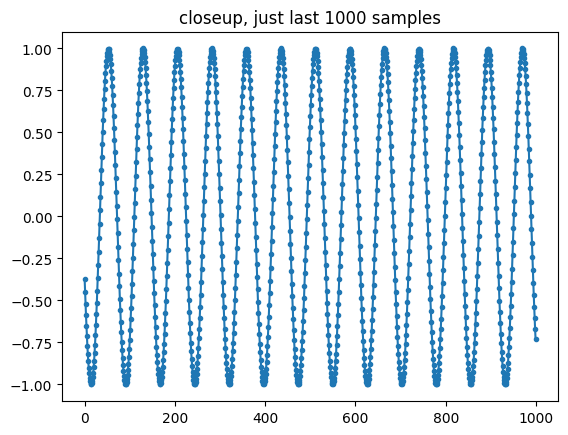

In [32]:
import matplotlib.pyplot as plt # importing another python module

s = make_tone(c_4_freq)

'''In this case the x values are implicitly 0..n-1
where n is the length of the supplied vector
'''
plt.plot(s, '-')
plt.title('all 20_000 samples')
plt.show() #
plt.plot(s[-1000:], '.-')
plt.title('closeup, just last 1000 samples');  # ; supresses some extra things from being printed

# Task 1

Implement a function which generates a whole range of tones.

> This could help: https://en.wikipedia.org/wiki/Piano_key_frequencies


Play them all in order. Do they sound okay?

> You can use the $make\_tone$ function above.

> You can return it as a tuple/array of np.arrays

Ideally create one *octave* of sounds starting from $C_4$ to $C_5$ (including the semitones like $C^{\#}_4$). You may then select only the full tones, because they may be easier to work with.

> If you don't know what that means, just try out various frequencies and create sounds from them.

> Tip: you go from one sound to the next by multiplying the frequency by something (not adding)!

> BTW. Have you ever wondered about the name of the programming language $C^{\#}$?

In [34]:
def get_freq(n):
  return 440 * 2**((n-49)/12)

In [ ]:
# one possible solution

def generate_octave(from_freq):
  # either use freqs or generate starting from from_freq

  return [get_freq(n) for n i] # use list comprehension??

tones = generate_octave(c_4_freq) # tones is a list of np.arrays,
play_sound(np.concatenate(tones)) # we turn it into one long array and play it

# Task 2 (most likely for class II)

Take a couple of sounds generated in Task 1 and see/listen what happens if you
take two vectors representing two sounds and:
- multiply one by a number
- add them
- concatenate two sounds etc.

> Tip: the sound playback we use **normalizes the maximum volume** in a given sound. So even if you make the entire sound, say, twice as loud, you'll get the same playback volume. But if you make a part of the sound louder, you will hear this part louder.

> Tip: you may need to multiply/divide by a large number to hear any difference!

In [ ]:
# example with multiplication
tone = make_tone(c_4_freq, 2)

tone[20_000:] *= 10

play_sound(tone)

In [ ]:
# plot?

In [ ]:
plt.plot(tone)


In [ ]:
tone1 = make_tone(440*2, 3)
tone2 = make_tone(440, 3)
tone3 = make_tone(220, 3)

#play_sound(tone2 + tone3 + tone1)
play_sound(np.concatenate((tone2, tone3, tone2+tone3)))

In [ ]:
for t in [tone1, tone2]:
  plt.plot(t[:50])
plt.plot((tone1 + tone2)[:50], '--')

# Aside: noise-cancelling headphones

Say env is the environment side recorded by microphones in the headphones,
and they try to produce a negative sounds (i.e. -env) to cancel things out.

If everyhting works perfectly, you'll get perfect silence.

However, ff they produce a delay you may get some extra noise!



In [ ]:
a, b = make_tone(c_4_freq), make_tone(c_4_freq*4)
env = a + b/10
delay = 0
cancel = -env[delay:]

k = 100
plt.plot(env[:k] + cancel[:k], color='red')
plt.plot(env[:k], color='blue', alpha=0.3)
plt.plot(cancel[:k], color='orange', alpha=0.3)

In [ ]:
plt.plot(some_tone);

# Task 2.5

You may have noticed the annoying 'click' at the end of each tone we generate with make_tone. Can you fix this?

Implement a function which gets rid of this. Use it in the next tasks.

> It doesn't have to be sophisticated, but it's best if it **keeps the length of the np.array the same.**

> Tip: look one of the graphs above and think what can cause the 'click'.

> Tip: Remember that the vector you generate controls the displacement/vibration of the speaker, which in turn creates the pressure wave in the air. So try to think what happens after the last element of the vector is 'played'.

> Tip: Could you simply make the sound progressively quieter?

In [ ]:
def fade_out(tone):
  '''
  Return a new tone represented as an np.array so that
  the annoying click in 'tone' at the end disappears.

  Preferably, keep the length of 'tone' the same.
  '''
  pass

In [ ]:
# for example:
some_tone = make_tone(c_4_freq)
new_tone = fade_out(some_tone) # some_tone gets modified
play_sound(new_tone) # now it should sound nice

# Task 2.6

Visualize the result of your algorithm in Task 2.5 using plt.plot (as above)

> It also makes sense to focus on the final part of the sound.

# Extra: how to save sound to an mp3 file!

In [ ]:
# saving to mp3

!pip install pydub

import pydub

def write_mp3(f, x, sample_rate=20_000):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1

    x /= np.max(np.abs(x))
    y = np.int16(x * 2 ** 15)

    song = pydub.AudioSegment(y.tobytes(), frame_rate=sample_rate,
                              sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

# write_mp3("x.mp3", some_tone)

# Exercise 3 (creative solutions will be worth many activity points!)

Using previous tasks, create a short song by combining individual tones. Feel free to share on discord! Last time we had some nice sounding tunes (and other things).

It can be e.g. some childrens' song popular in whatever country you're from.

> Please post: **code, music in mp3 and explanation**.

> Tip you can also add pauses/silence

> You can also string some random tones, whatever makes some noise is okay.

> Tip: Are you limited to playing one tone at a time?

> Suggestion for an interesting take:
Each of your tones had a constant frequency. One can also create music by changing the frequency of the sound (almost) continously. https://en.wikipedia.org/wiki/Musical_saw is one example which comes to mind. Try to generate something similar.

In [ ]:
# here is one supposed classic to get you started:
length_in_sec = 273
concert = np.zeros(length_in_sec * TIMESTEPS_PER_SECOND)
concert[0] = 1
play_sound(concert)